##### 붓꽃의 품종을 머신러닝을 이용하여 꽃잎과 꽃받침의 크기를 기반으로 분류

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_csv("c:/data/iris/iris.csv")
print(df.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth    Name  Species
0          5.1         3.5          1.4         0.2  setosa        0
1          4.9         3.0          1.4         0.2  setosa        0
2          4.7         3.2          1.3         0.2  setosa        0
3          4.6         3.1          1.5         0.2  setosa        0
4          5.0         3.6          1.4         0.2  setosa        0


In [4]:
# 품종을 기준으로 한 평균값들
df.groupby("Species").mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


Text(0, 0.5, 'SepalWidth')

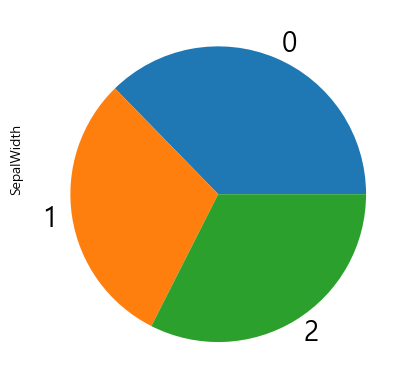

In [5]:
#파이차트
sums_by_species = df.groupby('Species').sum()
var = 'SepalWidth'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
#plt.savefig('iris_pie.png')

         SepalLength  SepalWidth  PetalLength  PetalWidth
Species                                                  
0              250.3       170.9         73.2        12.2
1              296.8       138.5        213.0        66.3
2              329.4       148.7        277.6       101.3


<AxesSubplot:xlabel='Species'>

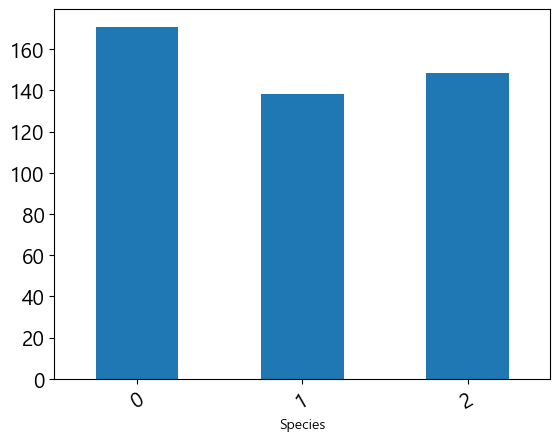

In [6]:
#품종별 변수 합계
sums_by_species = df.groupby('Species').sum()
print(sums_by_species)
var = 'SepalWidth'
#rot 글자회전(rotation)
#꽃받침 너비(cm) 기준 분류 그래프
sums_by_species[var].plot(kind='bar', fontsize=15, rot=30)

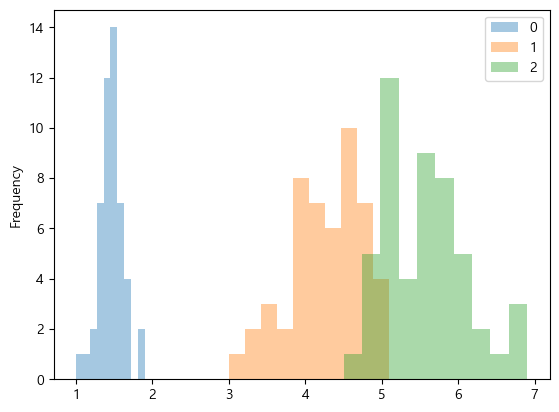

In [8]:
#품종별 꽃잎 길이
for spec in df['Species'].unique():
    subdf = df[df['Species']==spec]
    subdf['PetalLength'].plot(kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')

In [9]:
df["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: setosa, 1: versicolor, 2: virginica )')

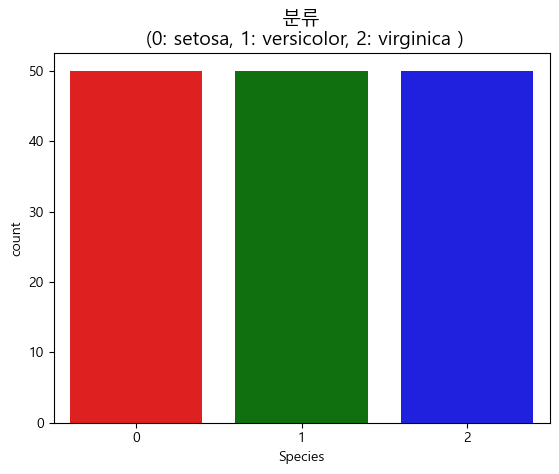

In [10]:
import seaborn as sns
colors = ["red", "green", "blue"]
sns.countplot('Species', data=df, palette=colors)
plt.title('분류\n (0: setosa, 1: versicolor, 2: virginica )', fontsize=14)

In [11]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[cols]
y = df['Species']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.9666666666666667
검증용: 1.0


In [13]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [14]:
df_cm=pd.DataFrame(cm, index=[0, 1, 2], columns=[0, 1, 2])
df_cm

,0,1,2
0,10,0,0
1,0,10,0
2,0,0,10


<AxesSubplot:title={'center':'Confusion Matrix'}>

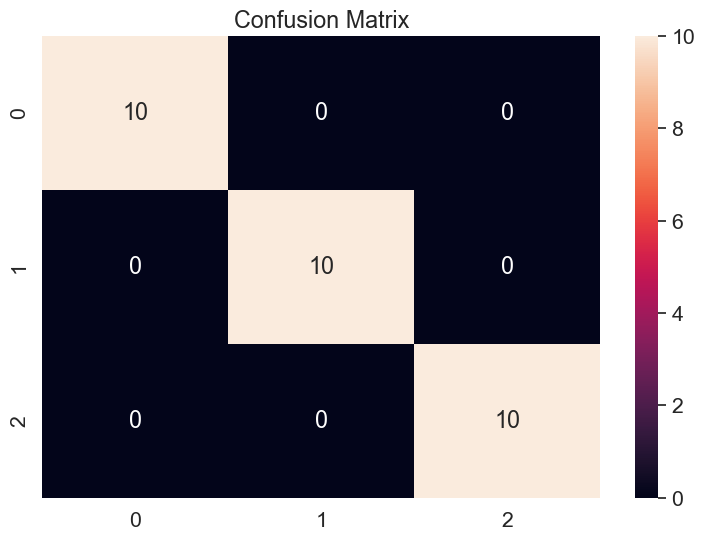

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

In [16]:
flowers=['setosa','versicolor','virginica']
X_new=[[7,3,5,1.4]]
pred=model.predict(X_new)
print(flowers[pred[0]])

versicolor


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [18]:
import joblib
joblib.dump(model, 'c:/data/iris/iris_logit.model')

['c:/data/iris/iris_logit.model']